<h1><center>Supervised Machine Learning (with Scikit-Learn)</center></h1>

<h2><center>Prediction (with Linear Regression algorythm)</center></h2>

<b>The AI Global Index was calculated by <a href = "https://www.tortoisemedia.com/intelligence/global-ai/">Tortoise Media </a> via weighting and summarizing 7 indicators: Talent, Infrastructure, Operating Environment, Research, Development, Government Strategy, Commercial. Unfortunately, I couldn't find the weights of each indicator and find out how the AI Global Index was exactly calculated.</b>

<b>Therefore, in this project I'm going to build a regression model that will predict the AI Global Index basing on the values of the 7 mentioned indicators. As a side effect I'm going to identify the most significant indicators for the AI growth.</b>

In [3]:
# Import libraries
import pandas as pd
import numpy as np

In [4]:
# Import dataset
filename = "AI_index_db.csv"
df = pd.read_csv(filename, index_col=0)
df.head(5)

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
Country,,,,,,,,,,,,
United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


First we have to create features. 
Let's pretend that we don't know that the Global AI Index depends on all of the 7 indicators and check just one, e.g. talent. Just as an example of assessing the relationship between one feature and target values.

In [41]:
# Create X from the Talent column's values
X = df[["Talent"]].values

# Create y from the Total score column's values which are the Global AI index values
y = df["Total score"].values

# Check the shape of the features and targets
print(X.shape, y.shape)

(62, 1) (62,)


Now we have created our feature and target arrays, we will train a linear regression model on feature and target values.
As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

In [40]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print("Predictions: {}, Actual Values: {}".format(predictions[:5], y[:5]))

Predictions: [95.19720655 23.66358187 43.48976555 36.31841043 40.15684184], Actual Values: [100.    62.92  40.93  40.19  39.89]


The prediction for China looks awful! Predicted 23.66 in comparison with actual 62.92! Other predictions don't look very bad, but they are far away from being perfect. 

Now we can visualize how well the model fits the data. This allows us to interpret the relationship between Talent and The Global AI Index.

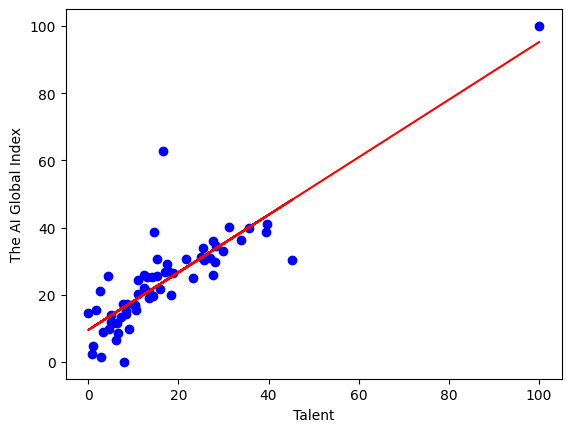

In [22]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Talent")
plt.ylabel("The AI Global Index")

# Display the plot
plt.show()

The model nicely captures a near-perfect linear correlation between Talent indicator and The Global Ai Index. However, let's make our predictions more accurate taking into consideration all 7 indicators we mentioned before.
To reach this, we have to create a multiple linear regression model using all of the 7 indicators.

In [42]:
# Import the module
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = df[["Talent", "Infrastructure", "Operating Environment", "Research", "Development", "Government Strategy", "Commercial"]].values
y = df["Total score"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:5], y_test[:5]))

Predictions: [25.79533183 11.61788696 30.25060742 26.59866239 40.93211759], Actual Values: [25.79 11.62 30.25 26.6  40.93]


Looks great! Our next task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

In [26]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9999998271705571
RMSE: 0.003736512423876222


The features explain 99.9% of the Global AI Index values! It's obvious since we know the Global AI Index was calculated through the features indicators though we don't know the weights of each indicator).

<blockquote>Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.</blockquote>

Therefore, at the next step we have to build a linear regression model using 6-fold cross-validation to assess its accuracy for predicting the Global AI Index using 7 indicators of Infrustructure, Investment and Implementation of AI. And display the individual score for each of the six-folds.

In [30]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.99999979 0.99999982 0.99999997 0.99999996 0.99999987 0.99999981]


By using cross-validation, we can see how performance varies depending on how the data is split. Actually, in our case the way we split the data doesn't change the accuracy significantly.

<blockquote>Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.</blockquote>

Let's imply Ridge.

In [29]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print("Ridge scores:", ridge_scores)

Ridge scores: [0.9999998263154828, 0.9999998176264873, 0.9999996324400697, 0.9999879983575798, 0.9989687641394047, 0.9551200327529987]


Well done! The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur.

Let's see now which indicator has the highest weight for the Global AI Index.

Coefficients: [0.22804777 0.13679835 0.09093496 0.22956978 0.13732671 0.04568093
 0.22673813]


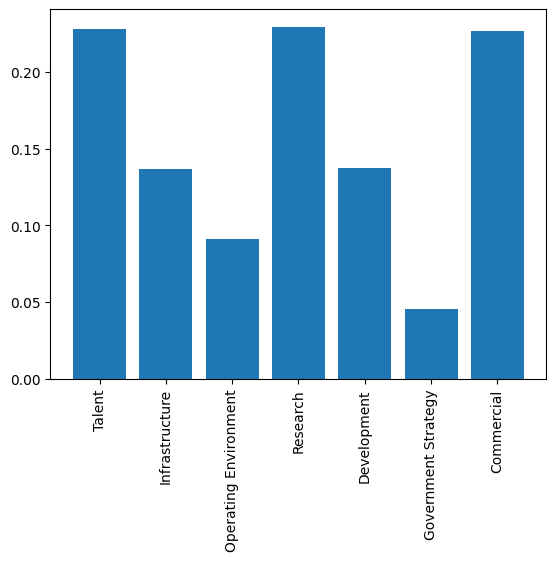

In [35]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print("Coefficients:", lasso_coef)

columns = ["Talent", "Infrastructure", "Operating Environment", "Research", "Development", "Government Strategy", "Commercial"]
plt.bar(columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

It looks like Research indicator has the highest impact on the Global AI Index following by Talent and Commercial indicators.